In [4]:
%matplotlib notebook

In [24]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Sample function to plot player movement from tracking_week.csv
def animate_player_movement(df, nflId, gameId, playId):
    # Filter data for the specific player, game, and play
    player_data = df[(df['nflId'] == nflId) & (df['gameId'] == gameId) & (df['playId'] == playId)]
    
    # Extract the x, y coordinates and frame IDs
    x_coords = player_data['x'].values
    y_coords = player_data['y'].values
    frames = player_data['frameId'].values
    
    # Set up the plot
    fig, ax = plt.subplots()
    ax.set_xlim(0, 120)  # NFL field length (0-120 yards)
    ax.set_ylim(0, 53.3)  # NFL field width (0-53.3 yards)
    ax.set_title(f"Player {nflId} Movement - Game {gameId}, Play {playId}")
    
    # Initialize a point to represent the player
    player_dot, = ax.plot([], [], 'bo', markersize=10)  # Blue circle for the player

    # Initialize function for the animation
    def init():
        player_dot.set_data([], [])
        return player_dot,

    # Update function for each frame in the animation
    def update(frame):
        current_x = x_coords[frame]
        current_y = y_coords[frame]
        player_dot.set_data(current_x, current_y)
        return player_dot,

    # Create the animation
    anim = FuncAnimation(fig, update, frames=len(frames), init_func=init, blit=True, interval=100)
    
    return anim

In [2]:
# Example usage
# Load the tracking_week.csv
df = pd.read_csv('tracking_week_1.csv')

<IPython.core.display.Javascript object>


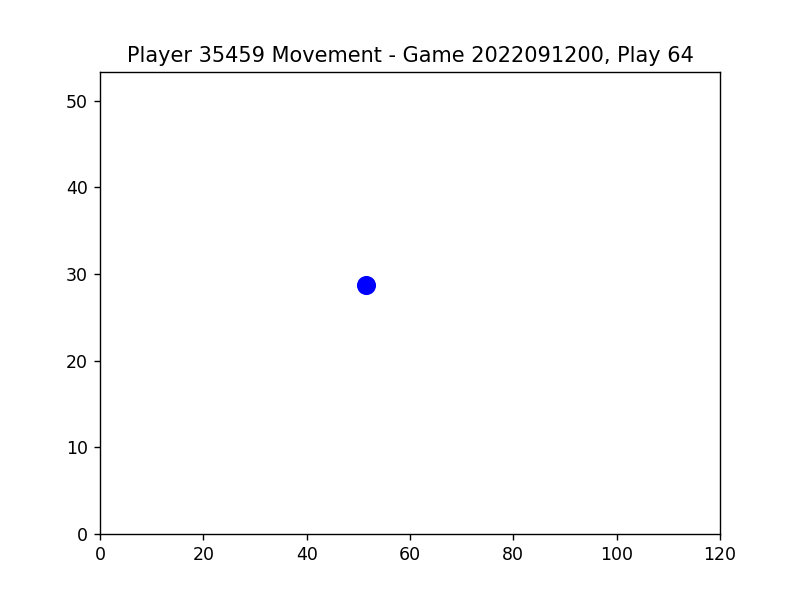

In [25]:
# Parameters: nflId (player), gameId, playId
animate_player_movement(df, nflId=35459, gameId=2022091200, playId=64)

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

# Function to initialize player markers on the plot
def init_player_markers(ax, unique_players, play_data):
    player_markers = {} 
    # Define colors for teams (for simplicity, you can modify based on actual teams)
    team_colors = {
    'DEN': 'orange',
    'SEA': 'green',
    'football': 'brown',  # Special case for the football
    'TB': 'red',
    'DAL': 'navy',
    'TEN': 'lightblue',
    'NYG': 'blue',
    'MIN': 'purple',
    'GB': 'green',
    'LV': 'black',
    'LAC': 'yellow',
    'KC': 'red',
    'ARI': 'darkred',
    'JAX': 'teal',
    'WAS': 'burgundy',
    'NYJ': 'green',
    'BAL': 'purple',
    'MIA': 'aqua',
    'NE': 'navy',
    'IND': 'blue',
    'HOU': 'darkblue',
    'PHI': 'darkgreen',
    'DET': 'blue',
    'CIN': 'orange',
    'PIT': 'yellow',
    'SF': 'red',
    'CHI': 'darkorange',
    'CLE': 'brown',
    'CAR': 'lightblue',
    'NO': 'black',
    'ATL': 'red',
    'BUF': 'blue',
    'LA': 'blue'
    }
    football_color = 'brown'  # Special color for the football
    
    for player_id in unique_players:
        if pd.isna(player_id):
            # Special case for the football
            player_markers[player_id] = ax.plot([], [], 'o', color=football_color, markersize=10)[0]
        else:
            # Get the team and set color
            team = play_data[play_data['nflId'] == player_id]['club'].iloc[0]
            color = team_colors.get(team, 'green')  # Default to green if team not found
            player_markers[player_id] = ax.plot([], [], 'o', color=color)[0]
    
    return player_markers

# Function to update player positions on the plot for each frame
def update_player_positions(frame, play_data, player_markers):
    current_frame_data = play_data[play_data['frameId'] == frame]
    
    for player_id, marker in player_markers.items():
        if player_id in current_frame_data['nflId'].values or pd.isna(player_id):
            if pd.isna(player_id):
                # Handle football (nflId is NaN)
                football_data = current_frame_data[pd.isna(current_frame_data['nflId'])]
                if not football_data.empty:
                    x, y = football_data['x'].values[0], football_data['y'].values[0]
                    marker.set_data(x, y)
            else:
                # Handle players
                player_info = current_frame_data[current_frame_data['nflId'] == player_id]
                if not player_info.empty:
                    x, y = player_info['x'].values[0], player_info['y'].values[0]
                    marker.set_data(x, y)
    
    return list(player_markers.values())

# Main function to animate the entire play with all players
def animate_play(df, gameId, playId):
    # Filter data for the specific game and play
    play_data = df[(df['gameId'] == gameId) & (df['playId'] == playId)]
    
    # Extract unique player IDs (includes NaN for football)
    unique_players = play_data['nflId'].unique()

    # Set up the plot
    fig, ax = plt.subplots()
    ax.set_xlim(0, 120)  # NFL field length (0-120 yards)
    ax.set_ylim(0, 53.3)  # NFL field width (0-53.3 yards)
    ax.set_title(f"Game {gameId}, Play {playId} - Player Movement")

    # Initialize player markers
    player_markers = init_player_markers(ax, unique_players, play_data)

    # Create the animation function
    def update(frame):
        return update_player_positions(frame, play_data, player_markers)

    # Create the animation
    anim = FuncAnimation(fig, update, frames=play_data['frameId'].unique(), blit=True, interval=100)
    
    plt.show()
    return anim


<IPython.core.display.Javascript object>


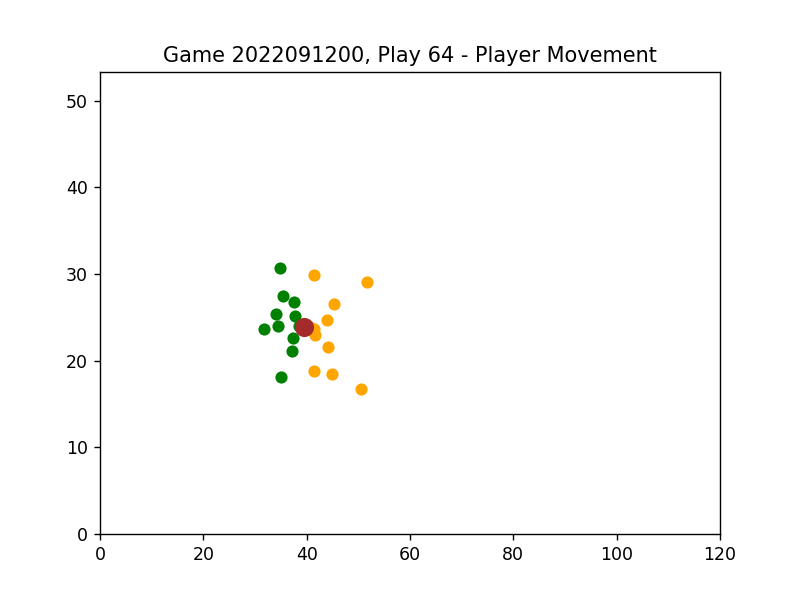

In [9]:
# Animate a play with all players and football
animate_play(df, gameId=2022091200, playId=64)

In [7]:
df.club.unique()

array(['DEN', 'SEA', 'football', 'TB', 'DAL', 'TEN', 'NYG', 'MIN', 'GB',
       'LV', 'LAC', 'KC', 'ARI', 'JAX', 'WAS', 'NYJ', 'BAL', 'MIA', 'NE',
       'IND', 'HOU', 'PHI', 'DET', 'CIN', 'PIT', 'SF', 'CHI', 'CLE',
       'CAR', 'NO', 'ATL', 'BUF', 'LA'], dtype=object)